In [122]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from utils import show_images
import functions as f

In [123]:
cuadro0 = cv2.imread('img/cuadro_0.jpg', cv2.COLOR_BGR2RGB)
cuadro1 = cv2.imread('img/cuadro_1.jpg', cv2.COLOR_BGR2RGB) # Imagen ancla
cuadro2 = cv2.imread('img/cuadro_2.jpg', cv2.COLOR_BGR2RGB)

In [124]:
# Look for the keypoints and descriptors with SIFT
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(cuadro1, None)
kp0, des0 = sift.detectAndCompute(cuadro0, None)
kp2, des2 = sift.detectAndCompute(cuadro2, None)

In [125]:
matches01, matchesMask01 = f.match_descriptors(des0, des1)
matches21, matchesMask21 = f.match_descriptors(des2, des1)

In [126]:
draw_params_01 = dict(matchColor=(0, 255, 0), singlePointColor=(255, 0, 0), matchesMask=matchesMask01, flags=cv2.DrawMatchesFlags_DEFAULT)
draw_params_21 = dict(matchColor=(0, 255, 0), singlePointColor=(255, 0, 0), matchesMask=matchesMask21, flags=cv2.DrawMatchesFlags_DEFAULT)

img_matches01 = cv2.drawMatchesKnn(cuadro0, kp0, cuadro1, kp1, matches01, None, **draw_params_01)
img_matches21 = cv2.drawMatchesKnn(cuadro2, kp2, cuadro1, kp1, matches21, None, **draw_params_21)

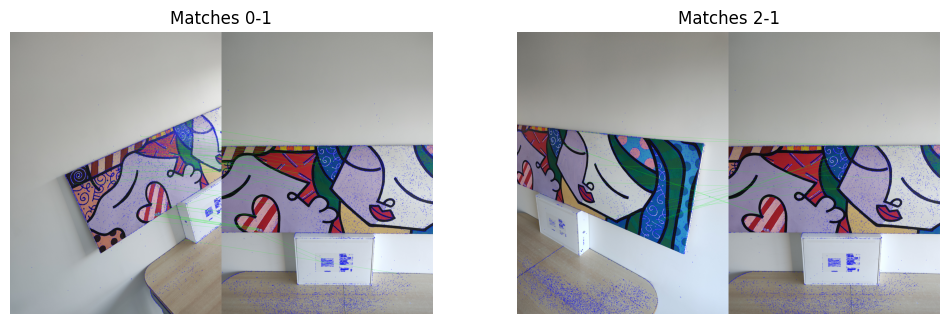

In [127]:
show_images([img_matches01, img_matches21], ['Matches 0-1', 'Matches 2-1'])

In [128]:
good_matches01 = f.get_good_matches(matches01, matchesMask01)
good_matches21 = f.get_good_matches(matches21, matchesMask21)

H01 = f.find_homography(kp0, kp1, good_matches01)
H21 = f.find_homography(kp2, kp1, good_matches21)

print('Number of good matches:', len(good_matches01))
print('Number of good matches:', len(good_matches21))

Number of good matches: 53
Number of good matches: 14


In [129]:
result01 = f.warp_images_color(cuadro0, cuadro1, H01)
result21 = f.warp_images_color(cuadro2, cuadro1, H21)

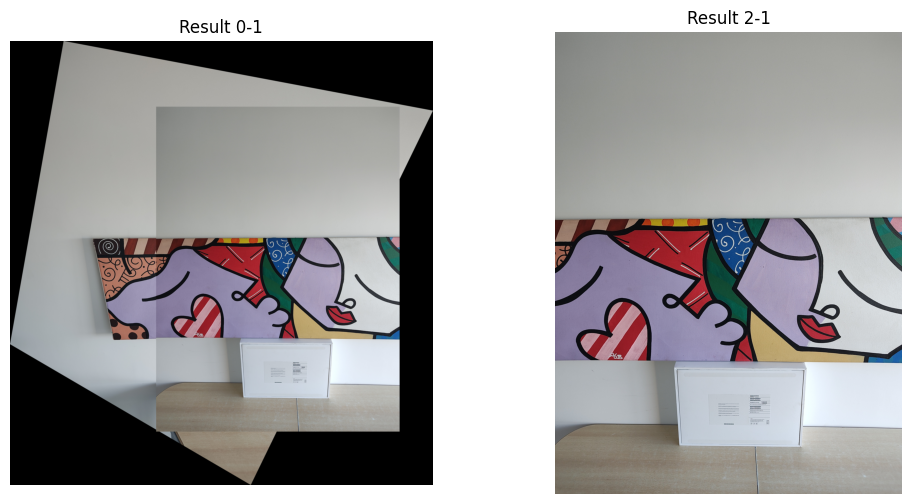

In [130]:
show_images([result01, result21], ['Result 0-1', 'Result 2-1'])